<a href="https://colab.research.google.com/github/Ziadnasser1/Deep-Learning-Training/blob/main/DifferentFilters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing required libraries.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import math

# Downloading the image and applying different filters "mean, median, min and max".



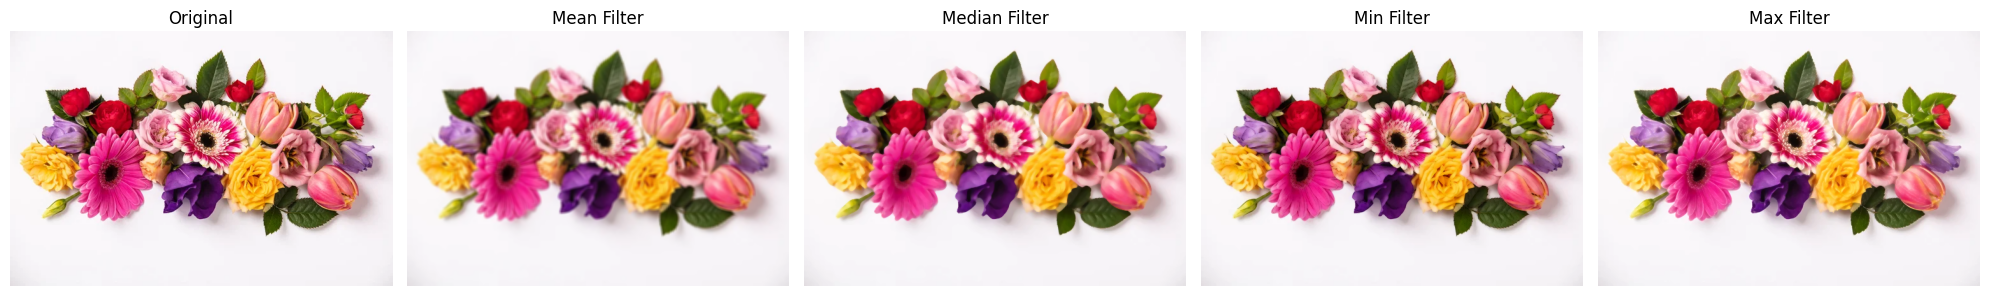

In [ ]:
im = cv2.imread('Flowers.jpg')

# Apply mean, median, min, and max filters
mean_filter = cv2.blur(im, (5, 5))
median_filter = cv2.medianBlur(im, 5)
min_filter = cv2.min(im, median_filter)
max_filter = cv2.max(im, median_filter)

# Convert the images from BGR to RGB for displaying with Matplotlib
im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
mean_filter_rgb = cv2.cvtColor(mean_filter, cv2.COLOR_BGR2RGB)
median_filter_rgb = cv2.cvtColor(median_filter, cv2.COLOR_BGR2RGB)
min_filter_rgb = cv2.cvtColor(min_filter, cv2.COLOR_BGR2RGB)
max_filter_rgb = cv2.cvtColor(max_filter, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(20, 10))

plt.subplot(1, 5, 1)
plt.imshow(im_rgb)
plt.title('Original')
plt.axis('off')

plt.subplot(1, 5, 2)
plt.imshow(mean_filter_rgb)
plt.title('Mean Filter')
plt.axis('off')

plt.subplot(1, 5, 3)
plt.imshow(median_filter_rgb)
plt.title('Median Filter')
plt.axis('off')

plt.subplot(1, 5, 4)
plt.imshow(min_filter_rgb)
plt.title('Min Filter')
plt.axis('off')

plt.subplot(1, 5, 5)
plt.imshow(max_filter_rgb)
plt.title('Max Filter')
plt.axis('off')

plt.tight_layout()
plt.show()


# Applying Grayscale and Contrast to the image.

Changing the image from **BGR** to **Grayscale**.

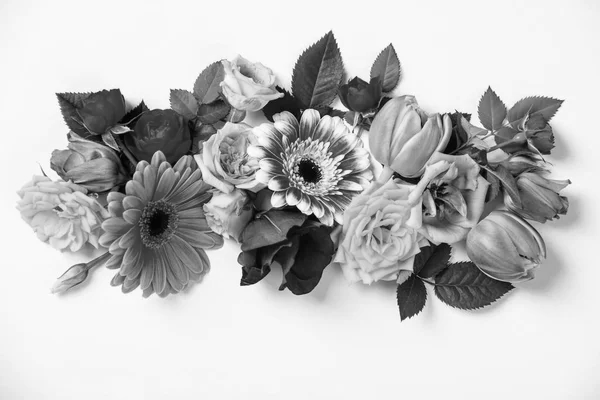

In [ ]:
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
cv2_imshow(im_gray)

Applying Contrast hitogram from scratch.

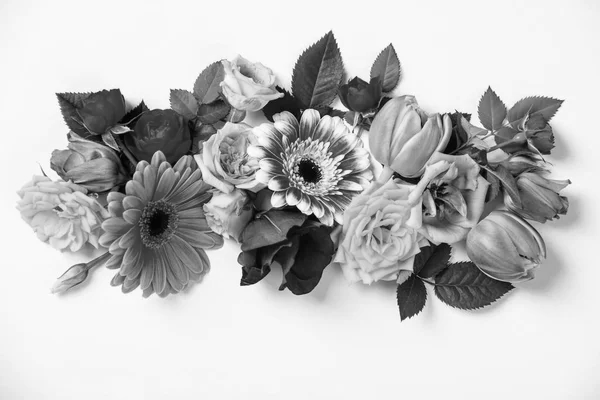

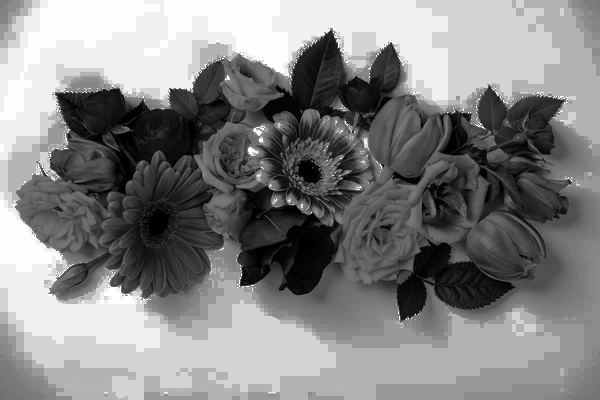

In [ ]:

def contrast(img):
    hist = {}
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            pixel_value = img[i][j]
            if pixel_value in hist:
                hist[pixel_value] += 1
            else:
                hist[pixel_value] = 1

    cumsum = []
    current_sum = 0
    for value in sorted(hist.keys()):
        current_sum += hist[value]
        cumsum.append((value, current_sum))

    cumsum_max = cumsum[-1][1]

    K = 255
    N, M = img.shape

    new_img= np.zeros(256, dtype=np.uint8)
    for value, cum_value in cumsum:
        new_value = math.ceil(((K * cum_value) / (N * M)) - 1)
        new_img[value] = new_value

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            img[i][j] = new_img[img[i][j]]

    return img

im = cv2.imread('Flowers.jpg')
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

cv2_imshow(im_gray)

im_contrast = contrast(im_gray.copy())

cv2_imshow(im_contrast)


# Edge detection filters.

Applying **Sobel** edge detection filter.

In [ ]:
im = cv2.imread('einstein.jpg')
cv2_imshow(im)

sobel_filter = cv2.Sobel(im, cv2.CV_64F, 1, 0, ksize=5)
cv2_imshow(sobel_filter)